# Imports

In [98]:
import pandas as pd
import sys
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\custom_python")
from silvhua import *
import seaborn as sns
import matplotlib.pyplot as plt
from silvhua_plot import *
from PIL import Image

# load data

In [5]:
path = r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\data'
df_fw = load_csv('data_freeweight.csv',path, column1_as_index=False)
print(df_fw.shape)
df_fw.head()

Dataframe shape:  (52, 15)
(52, 15)


,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV
0,22,77.8,175.0,39.0,78,114.0,156.0,175.0,190.0,1.05,0.91,0.76,0.52,0.39,0.26
1,21,71.6,179.0,24.0,48,72.0,96.0,108.0,120.0,1.03,0.91,0.68,0.49,0.39,0.27
2,19,60.8,165.0,26.0,52,78.0,104.0,117.0,130.0,1.06,0.92,0.76,0.51,0.37,0.26
3,21,58.4,172.0,20.0,40,60.0,80.0,90.0,100.0,0.97,0.85,0.68,0.50,0.38,0.26
4,20,82.3,185.0,30.0,60,90.0,120.0,135.0,150.0,1.02,0.92,0.76,0.50,0.40,0.29


In [93]:
df_sm = load_csv('data_sm.csv',path, column1_as_index=False)
df_sm.head()

Dataframe shape:  (52, 15)


,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV
0,22,77.8,175.0,42.0,84,126.0,168.0,189.0,210.0,1.05,0.92,0.72,0.51,0.40,0.28
1,21,71.6,179.0,30.0,60,90.0,120.0,135.0,150.0,1.06,0.90,0.67,0.50,0.38,0.26
2,19,60.8,165.0,30.0,60,90.0,120.0,135.0,150.0,1.09,0.92,0.74,0.48,0.36,0.24
3,21,58.4,172.0,24.0,48,72.0,96.0,108.0,120.0,1.07,0.91,0.73,0.53,0.42,0.27
4,20,82.3,185.0,35.0,70,105.0,140.0,157.5,175.0,1.03,0.91,0.70,0.51,0.38,0.29


In [3]:
df_fw.columns

Index(['Age', 'Mass', 'Height', 'Load20%1RM', 'Load40%1RM', 'Load60%1RM',
       'Load80%1RM', 'Load90%1RM', 'Load-1RM-1', '20% MV', '40%MV', '60%MV',
       '80%MV', '90%MV', '100%MV'],
      dtype='object')

In [6]:
velocity_columns = df_fw.columns[df_fw.columns.str.contains('MV')].to_list()
load_columns = df_fw.columns[df_fw.columns.str.contains('Load')].to_list()
velocity_columns+load_columns

['20% MV',
 '40%MV',
 '60%MV',
 '80%MV',
 '90%MV',
 '100%MV',
 'Load20%1RM',
 'Load40%1RM',
 'Load60%1RM',
 'Load80%1RM',
 'Load90%1RM',
 'Load-1RM-1']

# EDA

## Reshape data frame

### Experiment with commands

In [7]:
test = df_fw.loc[:1,velocity_columns+load_columns]
test

,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1
0,1.05,0.91,0.76,0.52,0.39,0.26,39.0,78,114.0,156.0,175.0,190.0
1,1.03,0.91,0.68,0.49,0.39,0.27,24.0,48,72.0,96.0,108.0,120.0


In [8]:
# test = test.melt(
#     id_vars='Load-1RM-1',
#     value_vars=velocity_columns, var_name='%1RM', value_name='velocity',
#     ignore_index=False
#     )
test = pd.concat([
    test.melt(
        id_vars='Load-1RM-1',
        value_vars=velocity_columns, var_name='%1RM', value_name='velocity',
        ignore_index=False
    ),
    test.melt(
        # id_vars='Load-1RM-1',
        value_vars=load_columns, var_name='%1RM', value_name='absolute load',
        ignore_index=False
    )
], axis=1)
test

,Load-1RM-1,%1RM,velocity,%1RM,absolute load
0,190.0,20% MV,1.05,Load20%1RM,39.0
1,120.0,20% MV,1.03,Load20%1RM,24.0
0,190.0,40%MV,0.91,Load40%1RM,78.0
1,120.0,40%MV,0.91,Load40%1RM,48.0
0,190.0,60%MV,0.76,Load60%1RM,114.0
1,120.0,60%MV,0.68,Load60%1RM,72.0
0,190.0,80%MV,0.52,Load80%1RM,156.0
1,120.0,80%MV,0.49,Load80%1RM,96.0
0,190.0,90%MV,0.39,Load90%1RM,175.0
1,120.0,90%MV,0.39,Load90%1RM,108.0


In [9]:
df_fw.head(4).sort_values('Load-1RM-1').reset_index(drop=True)

,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV
0,21,58.4,172.0,20.0,40,60.0,80.0,90.0,100.0,0.97,0.85,0.68,0.50,0.38,0.26
1,21,71.6,179.0,24.0,48,72.0,96.0,108.0,120.0,1.03,0.91,0.68,0.49,0.39,0.27
2,19,60.8,165.0,26.0,52,78.0,104.0,117.0,130.0,1.06,0.92,0.76,0.51,0.37,0.26
3,22,77.8,175.0,39.0,78,114.0,156.0,175.0,190.0,1.05,0.91,0.76,0.52,0.39,0.26


### Create function: reshape_group_df

In [85]:
# Create function
def reshape_group_df(df):
    """
    Reshape dataframe each row represents data from one rep (each participant has multiple columns)
    """
    # Sort participants by strength
    df = df.sort_values('Load-1RM-1').reset_index(drop=True)
    
    velocity_columns = df.columns[df.columns.str.contains('MV')]
    load_columns = df.columns[df.columns.str.contains('Load')]
    df = pd.concat([
        df.melt(
            value_vars=load_columns, value_name='absolute load',
            ignore_index=False
        ),
        df.melt(
            id_vars='Load-1RM-1',
            value_vars=velocity_columns, var_name='%1RM', value_name='mean velocity',
            ignore_index=False
            )
    ], axis=1).drop(columns='variable')
    df['%1RM'] = df['%1RM'].str.replace('(\d*)\D*','\\1', regex=True).astype(float)
    df = df.rename({'Load-1RM-1':'1RM'}, axis=1)

    df = df.reset_index(names='participant')
    return df

# Test the function on first participant's data
print(df_fw.head(1).filter(regex='Load|MV'))
reshape_group_df(df_fw.head(1))

   Load20%1RM  Load40%1RM  Load60%1RM  Load80%1RM  Load90%1RM  Load-1RM-1  \
0        39.0          78       114.0       156.0       175.0       190.0   

   20% MV  40%MV  60%MV  80%MV  90%MV  100%MV  
0    1.05   0.91   0.76   0.52   0.39    0.26  


,participant,absolute load,1RM,%1RM,mean velocity
0,0,39.0,190.0,20.0,1.05
1,0,78.0,190.0,40.0,0.91
2,0,114.0,190.0,60.0,0.76
3,0,156.0,190.0,80.0,0.52
4,0,175.0,190.0,90.0,0.39
5,0,190.0,190.0,100.0,0.26


In [84]:
# # Create function
# def reshape_group_df(df):
#     """
#     Reshape dataframe each row represents data from one rep (each participant has multiple columns)
#     """
#     # Sort participants by strength
#     df = df.sort_values('Load-1RM-1').reset_index(drop=True)
    
#     velocity_columns = df.columns[df.columns.str.contains('MV')]
#     load_columns = df.columns[df.columns.str.contains('Load')]
#     df = pd.concat([
#         df.melt(
#             value_vars=load_columns, value_name='absolute load',
#             ignore_index=False
#         ),
#         df.melt(
#             id_vars='Load-1RM-1',
#             value_vars=velocity_columns, var_name='%1RM', value_name='mean velocity',
#             ignore_index=False
#             )
#     ], axis=1).drop(columns='variable')
#     df['%1RM'] = df['%1RM'].str.replace('(\d*)\D*','\\1', regex=True).astype(float)
#     df = df.rename({'Load-1RM-1':'1RM'}, axis=1)

#     # df = df.reset_index(names='participant')
#     return df

# # Test the function on first participant's data
# print(df_fw.head(1).filter(regex='Load|MV'))
# reshape_group_df(df_fw.head(1))

In [20]:
pd.DataFrame(df_fw.loc[0]).transpose()

,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV
0,22.0,77.8,175.0,39.0,78.0,114.0,156.0,175.0,190.0,1.05,0.91,0.76,0.52,0.39,0.26


## Data visualization

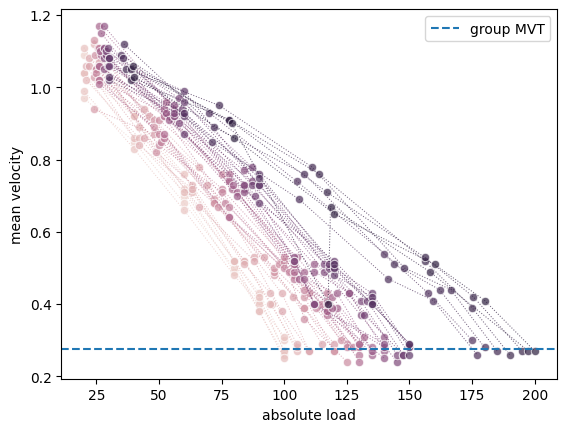

In [33]:
# Size of marker represents %1RM
ax = sns.lineplot(data=reshape_group_df(df_fw), x='absolute load', y='mean velocity',
    hue='participant', alpha=.7,marker='o', size=0.5, ls=':',
    legend=False,# size='%1RM'
)
ax.axhline(y=df_fw['100%MV'].mean(),
    label='group MVT',ls='--')
ax.legend()

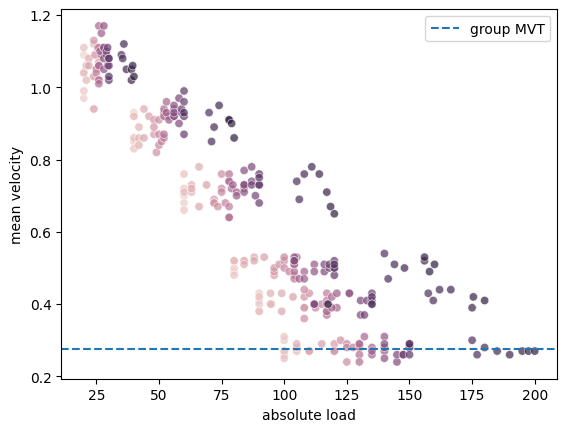

In [57]:
# Size of marker represents %1RM
ax = sns.scatterplot(data=reshape_group_df(df_fw), x='absolute load', y='mean velocity',
    hue='participant', alpha=.7,
    legend=False, #size='%1RM'
)
ax.axhline(y=df_fw['100%MV'].mean(),
    label='group MVT',ls='--')
ax.legend()

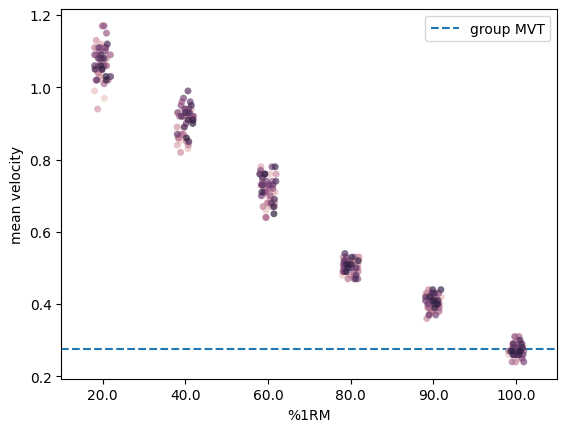

In [38]:
# ax = sns.stripplot(data=reshape_group_df(df_fw), x='%1RM', y='mean velocity',
#     alpha=0.7,
#     hue='participant',legend=False
# )

# ax.axhline(y=df_fw['100%MV'].mean(),
#     label='group MVT',ls='--')
# ax.legend()

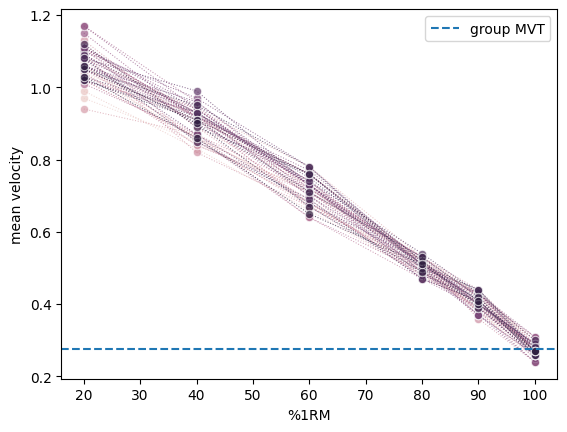

In [56]:
ax = sns.lineplot(data=reshape_group_df(df_fw), x='%1RM', y='mean velocity',
    alpha=0.7, marker='o', size=0.5,ls=':',
    hue='participant',legend=False
)

ax.axhline(y=df_fw['100%MV'].mean(),
    label='group MVT',ls='--')
ax.legend()

<AxesSubplot: xlabel='%1RM', ylabel='mean velocity'>

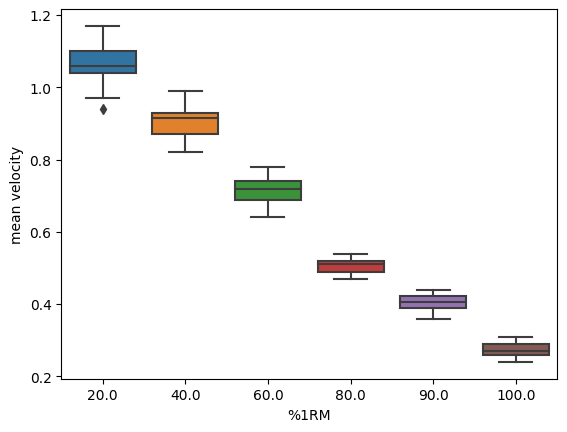

In [13]:
# Same as above but boxplot
sns.boxplot(data=reshape_group_df(df_fw), x='%1RM', y='mean velocity')

<AxesSubplot: xlabel='%1RM', ylabel='absolute load'>

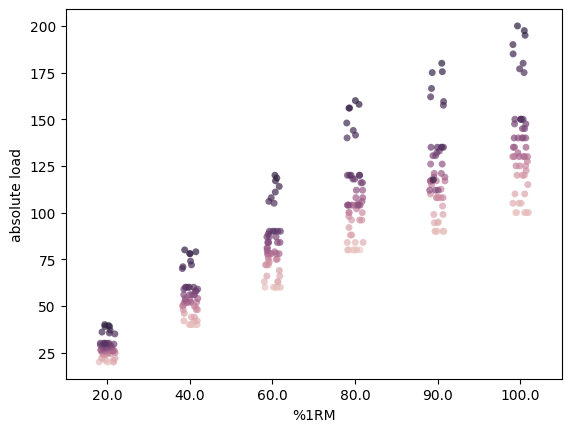

In [14]:
sns.stripplot(data=reshape_group_df(df_fw), x='%1RM', y='absolute load',
    alpha=0.7,
    hue='participant',legend=False
)

<AxesSubplot: xlabel='%1RM', ylabel='absolute load'>

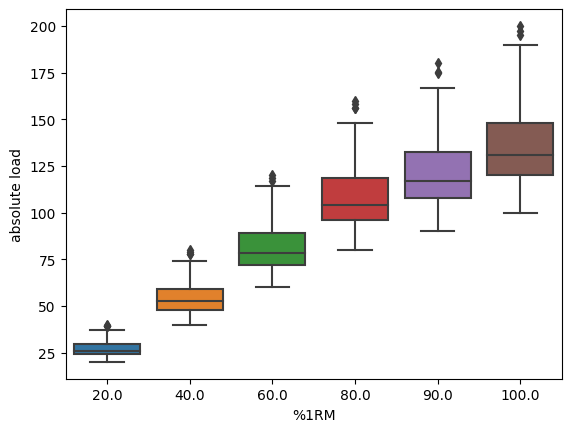

In [15]:
sns.boxplot(data=reshape_group_df(df_fw), x='%1RM', y='absolute load')

In [36]:
df_fw.columns

Index(['Age', 'Mass', 'Height', 'Load20%1RM', 'Load40%1RM', 'Load60%1RM',
       'Load80%1RM', 'Load90%1RM', 'Load-1RM-1', '20% MV', '40%MV', '60%MV',
       '80%MV', '90%MV', '100%MV'],
      dtype='object')

In [58]:
# # Figure with subplots for each person: of absolute load vs. mean velocity
# def plot_lv_profile(df, index_list):
#     group_mean_MVT = df_fw['100%MV'].mean()
#     fig, ax = plt.subplots(ncols=3, nrows=)
#     ax = sns.scatterplot(data=reshape_group_df(participant0), y='absolute load', x='mean velocity',
#         hue='participant')

#     ax.axvline(x=group_mean_MVT,
#     label='group MVT',ls='--')
#     ax.legend()

# Calculate slope and intercept

In [62]:
df_fw.head(2)

,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV
0,22,77.8,175.0,39.0,78,114.0,156.0,175.0,190.0,1.05,0.91,0.76,0.52,0.39,0.26
1,21,71.6,179.0,24.0,48,72.0,96.0,108.0,120.0,1.03,0.91,0.68,0.49,0.39,0.27


In [5]:
# # 2022-11-21 0:53 works if a dataframe is passsed
# def linear_regression(df):
#     """
#     Calculate slope and intercept using linear regression, where X = load, y = velocity.
#     """
#     from sklearn.linear_model import LinearRegression

#     velocity_columns = df.columns[df.columns.str.contains('MV')]
#     load_columns = df.columns[df.columns.str.contains('Load')]
#     load = df[load_columns].values.reshape(-1,1)
#     velocity = df[velocity_columns].values.reshape(-1,1)

#     lr = LinearRegression()
#     lr.fit(load, velocity)

#     df_lr = pd.DataFrame()
#     df_lr['slope'] = lr.coef_[0]
#     df_lr['intercept'] = lr.intercept_

#     return df_lr

# linear_regression(df_fw.head(1))

,slope,intercept
0,-0.005181,1.297675


In [8]:
# # 2022-11-21 0:53 Allow to be used as a stand-alone function or when called with .apply with transposed df. # 2022-11-25 10:38 realize I need to reverse the load and velocity for the calculations
# def linear_regression(df):
#     """
#     Calculate slope and intercept using linear regression, where X = load, y = velocity.
#     """
#     from sklearn.linear_model import LinearRegression

#     if type(df)==pd.Series:
#         velocity_columns = df.index[df.index.str.contains('MV')]
#         load_columns = df.index[df.index.str.contains('Load')]

#         load = df[load_columns].values.reshape(-1,1)
#         velocity = df[velocity_columns].values.reshape(-1,1)

#         lr = LinearRegression()
#         lr.fit(load, velocity)
        
#         # LinearRegression attributes are in arrays, so need to access values with indices
#         df['slope'] = lr.coef_[0][0] 
#         df['intercept'] = lr.intercept_[0]

#         return df
#     else:
#         velocity_columns = df.columns[df.columns.str.contains('MV')]
#         load_columns = df.columns[df.columns.str.contains('Load')]
#         load = df[load_columns].values.reshape(-1,1)
#         velocity = df[velocity_columns].values.reshape(-1,1)

#         lr = LinearRegression()
#         lr.fit(load, velocity)

#         df_lr = pd.DataFrame()
#         df_lr['slope'] = lr.coef_[0]
#         df_lr['intercept'] = lr.intercept_

#         return df_lr

# linear_regression(df_fw.head(1))

,slope,intercept
0,-0.005181,1.297675


In [327]:
# 2022-11-25 10:38 realize I need to reverse the load and velocity for the calculations
# 2022-11-21 0:53 Allow to be used as a stand-alone function or when called with .apply with transposed df.
def linear_regression(df):
    """
    Calculate slope and intercept using linear regression, where X = load, y = velocity.
    """
    from sklearn.linear_model import LinearRegression

    if type(df)==pd.Series:
        velocity_columns = df.index[df.index.str.contains('MV')]
        load_columns = df.index[df.index.str.contains('Load')]

        load = df[load_columns].values.reshape(-1,1)
        velocity = df[velocity_columns].values.reshape(-1,1)

        lr = LinearRegression()
        lr.fit(velocity, load)
        
        # LinearRegression attributes are in arrays, so need to access values with indices
        df['slope'] = lr.coef_[0][0] 
        df['intercept'] = lr.intercept_[0]

        return df
    else:
        velocity_columns = df.columns[df.columns.str.contains('MV')]
        load_columns = df.columns[df.columns.str.contains('Load')]
        load = df[load_columns].values.reshape(-1,1)
        velocity = df[velocity_columns].values.reshape(-1,1)

        lr = LinearRegression()
        lr.fit(velocity, load)

        df_lr = pd.DataFrame()
        df_lr['slope'] = lr.coef_[0]
        df_lr['intercept'] = lr.intercept_

        return df_lr

linear_regression(df_fw.head(1))

,slope,intercept
0,-189.397068,248.125765


In [286]:
def individual_regression(df):
    """
    Calculate slope and intercept for each row of the dataframe (i.e. for each individual participant)
    by calling the linear_regression function.
    """
    df_lr = df.transpose().apply(lambda x:linear_regression(x)).transpose()
    # df_lr = df.apply(lambda x: print(x['Age']))
    # print(type(df_lr))
    
    df_lr['group MVT'] =  df_lr['100%MV'].mean()
    print('Dataframe shape: ', df_lr.transpose().shape)
    return df_lr

individual_regression(df_fw.head(3))

Dataframe shape:  (18, 3)


,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV,slope,intercept,group MVT
0,22.0,77.8,175.0,39.0,78.0,114.0,156.0,175.0,190.0,1.05,0.91,0.76,0.52,0.39,0.26,-0.005181,1.297675,0.263333
1,21.0,71.6,179.0,24.0,48.0,72.0,96.0,108.0,120.0,1.03,0.91,0.68,0.49,0.39,0.27,-0.008061,1.257123,0.263333
2,19.0,60.8,165.0,26.0,52.0,78.0,104.0,117.0,130.0,1.06,0.92,0.76,0.51,0.37,0.26,-0.007854,1.310351,0.263333


In [328]:
individual_regression(df_fw.head(3))

Dataframe shape:  (18, 3)


,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV,slope,intercept,group MVT
0,22.0,77.8,175.0,39.0,78.0,114.0,156.0,175.0,190.0,1.05,0.91,0.76,0.52,0.39,0.26,-189.397068,248.125765,0.263333
1,21.0,71.6,179.0,24.0,48.0,72.0,96.0,108.0,120.0,1.03,0.91,0.68,0.49,0.39,0.27,-123.167417,155.390194,0.263333
2,19.0,60.8,165.0,26.0,52.0,78.0,104.0,117.0,130.0,1.06,0.92,0.76,0.51,0.37,0.26,-125.314695,165.536836,0.263333


In [241]:
# Test the function on first participant's data
df_fw2 = individual_regression(df_fw)

(52, 17)


In [9]:
df_fw2.head()

,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV,slope,intercept
0,22.0,77.8,175.0,39.0,78.0,114.0,156.0,175.0,190.0,1.05,0.91,0.76,0.52,0.39,0.26,-0.005181,1.297675
1,21.0,71.6,179.0,24.0,48.0,72.0,96.0,108.0,120.0,1.03,0.91,0.68,0.49,0.39,0.27,-0.008061,1.257123
2,19.0,60.8,165.0,26.0,52.0,78.0,104.0,117.0,130.0,1.06,0.92,0.76,0.51,0.37,0.26,-0.007854,1.310351
3,21.0,58.4,172.0,20.0,40.0,60.0,80.0,90.0,100.0,0.97,0.85,0.68,0.50,0.38,0.26,-0.008884,1.184140
4,20.0,82.3,185.0,30.0,60.0,90.0,120.0,135.0,150.0,1.02,0.92,0.76,0.50,0.40,0.29,-0.006323,1.264807


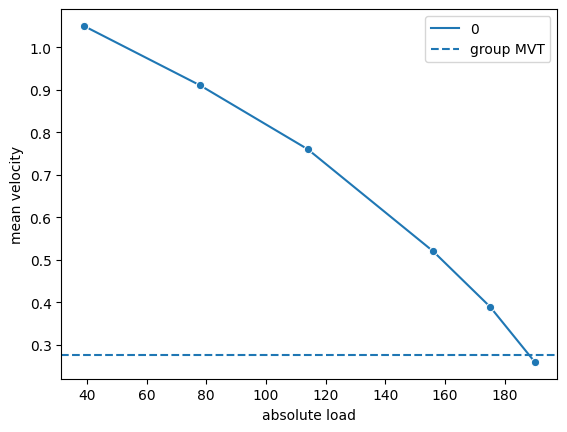

In [40]:
# Plot of mean velocity vs. absolute load
# This represents models 1 and 2
ax = sns.lineplot(data=reshape_group_df(participant0), x='absolute load', y='mean velocity',
hue='participant', marker='o')
ax.axhline(y=df_fw['100%MV'].mean(),
    label='group MVT',ls='--')
ax.legend()

## Plot individual load-velocity profiles

In [63]:
reshaped_df = reshape_group_df(df_fw)
reshaped_df

,participant,absolute load,1RM,%1RM,mean velocity
0,0,20.0,100.0,20.0,1.09
1,1,20.0,100.0,20.0,0.97
2,2,20.0,100.0,20.0,1.04
3,3,20.0,100.0,20.0,0.99
4,4,20.0,100.0,20.0,1.11
...,...,...,...,...,...
307,47,185.0,185.0,100.0,0.27
308,48,190.0,190.0,100.0,0.26
309,49,195.0,195.0,100.0,0.27
310,50,197.5,197.5,100.0,0.27


In [113]:
# 2022-11-25 10:41 Realized I should make load the y-variable
# import matplotlib.pyplot as plt
# def plot_profiles(df, y='mean velocity', x='absolute load', row='participant', 
#     show_legend=False, yaxis_label=None, xticks=None, title=None):

#     """
#     Make a figure containing subplots with lineplots. Subplots titles are labelled from a-z.

#     Parameters:
#     * df: Dataframe.
#     * y: Column name with y-axis data.
#     * x: Column name with x-axis data.
#     * column: Column name of categorical data for creating the different columns in the subplot. 
#         Default is Female/Male.
#     * row: Column name of categorical data for creating the different rows in the subplot.
#     * hue: Same as for seaborn parameter, i.e. categorical variable for creating different lines.
#     * yaxis_label: Label of y-axis. If none, will default to the name of the data column.
#     * xticks: Ticks of the x-axis. If none, will be set to default.
#     * title: Subplot title. If none, will be blank.
#     """
    
#     participants = sorted(df[row].unique())
#     subplot_label = [x+1 for x in range(-1,100)]
#     nrows = round((len(participants)+1)/4)

#     title_variable = df[row].name
#     fig, ax = plt.subplots(nrows=nrows ,ncols=4, figsize=(10,nrows*3))
#     fig.suptitle(title, fontsize=20)
#     ymin = df[y].min()
#     ymax = df[y].max()
#     ax = ax.flatten()
#     # colors = sns.color_palette("rocket", as_cmap = True)

#     ax_index = 0
#     for index, participant in enumerate(participants):
#         # print(participant)
#         if (show_legend==True):
#             legend = 'full'
#         else:
#             legend = False
#         filter = (df[row] == participant)

#         sns.lineplot(data=df[filter], y=y, 
#             x=x, marker='o', alpha=0.9,
#             legend=legend,
#                 ax = ax[ax_index])
#         if nrows > 1:
#             ax[ax_index].set_title(f'{subplot_label[ax_index]}) {title_variable} {participant}', loc='left')
#         else:
#             ax[ax_index].set_title(f'{subplot_label[ax_index]})', fontsize=12, loc='left')
#         ax[ax_index].set_ylim([ymin,ymax]) # Make the y axes all the same
#         if yaxis_label:
#             ax[ax_index].set_ylabel(yaxis_label)
#         if xticks:
#             ax[ax_index].xaxis.set_ticks(xticks)
#         if (legend == 'full'):
#             # Reverse order of legend entries, then position the legend
#             handles, labels = ax[ax_index].get_legend_handles_labels()
#             ax[ax_index].legend(handles[::-1], labels[::-1])
#             sns.move_legend(ax[ax_index],'center left',bbox_to_anchor=(1, 0.5))

#         ax_index += 1
        
#     plt.tight_layout(rect=[0, 0, 1, 0.98])
#     return fig

In [322]:
# 2022-11-25 10:41 Realized I should make load the y-variable
import matplotlib.pyplot as plt
def plot_profiles(df, y='absolute load', x='mean velocity', row='participant', 
    show_legend=False, yaxis_label=None, xticks=None, title=None):

    """
    Make a figure containing subplots with lineplots. Subplots titles are labelled from a-z.

    Parameters:
    * df: Dataframe.
    * y: Column name with y-axis data.
    * x: Column name with x-axis data.
    * column: Column name of categorical data for creating the different columns in the subplot. 
        Default is Female/Male.
    * row: Column name of categorical data for creating the different rows in the subplot.
    * hue: Same as for seaborn parameter, i.e. categorical variable for creating different lines.
    * yaxis_label: Label of y-axis. If none, will default to the name of the data column.
    * xticks: Ticks of the x-axis. If none, will be set to default.
    * title: Subplot title. If none, will be blank.
    """
    
    participants = sorted(df[row].unique())
    subplot_label = [x+1 for x in range(-1,100)]
    nrows = round((len(participants)+1)/4)

    title_variable = df[row].name
    fig, ax = plt.subplots(nrows=nrows ,ncols=4, figsize=(10,nrows*3))
    fig.suptitle(title, fontsize=20)
    ymin = df[y].min()
    ymax = df[y].max()
    ax = ax.flatten()
    # colors = sns.color_palette("rocket", as_cmap = True)

    ax_index = 0
    for index, participant in enumerate(participants):
        # print(participant)
        if (show_legend==True):
            legend = 'full'
        else:
            legend = False
        filter = (df[row] == participant)

        sns.lineplot(data=df[filter], y=y, 
            x=x, marker='o', alpha=0.9,
            legend=legend,
                ax = ax[ax_index])
        if nrows > 1:
            ax[ax_index].set_title(f'{subplot_label[ax_index]}) {title_variable} {participant}', loc='left')
        else:
            ax[ax_index].set_title(f'{subplot_label[ax_index]})', fontsize=12, loc='left')
        ax[ax_index].set_ylim([ymin,ymax]) # Make the y axes all the same
        if yaxis_label:
            ax[ax_index].set_ylabel(yaxis_label)
        if xticks:
            ax[ax_index].xaxis.set_ticks(xticks)
        if (legend == 'full'):
            # Reverse order of legend entries, then position the legend
            handles, labels = ax[ax_index].get_legend_handles_labels()
            ax[ax_index].legend(handles[::-1], labels[::-1])
            sns.move_legend(ax[ax_index],'center left',bbox_to_anchor=(1, 0.5))

        ax_index += 1
        
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    return fig

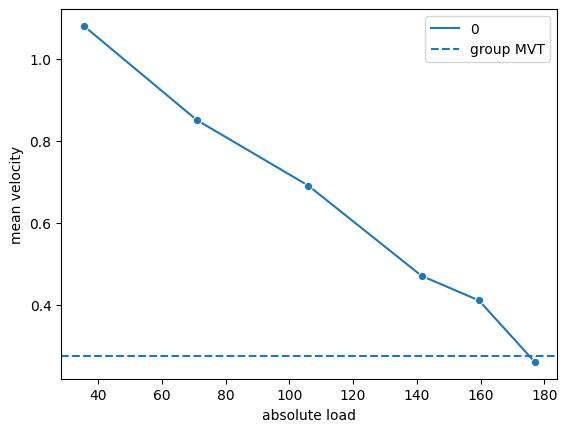

In [73]:
# Plot of mean velocity vs. absolute load
# This represents models 1 and 2
ax = sns.lineplot(data=reshape_group_df(pd.DataFrame(df_fw.loc[51]).transpose()), x='absolute load', y='mean velocity',
hue='participant', marker='o')
ax.axhline(y=df_fw['100%MV'].mean(),
    label='group MVT',ls='--')
ax.legend()

### Free weight

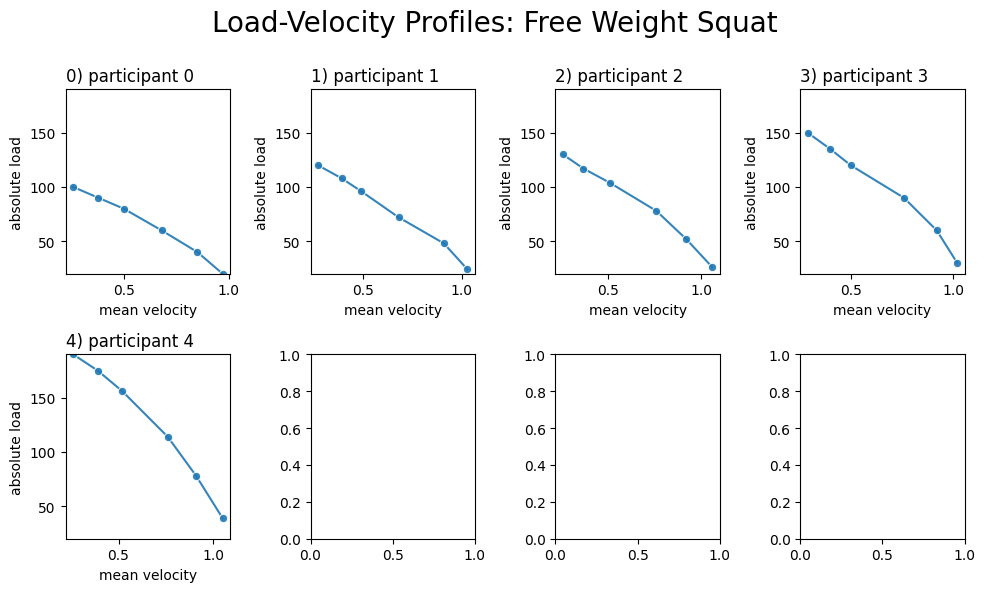

In [324]:
plot_profiles(reshape_group_df(df_fw2.head(5)), title='Load-Velocity Profiles: Free Weight Squat');

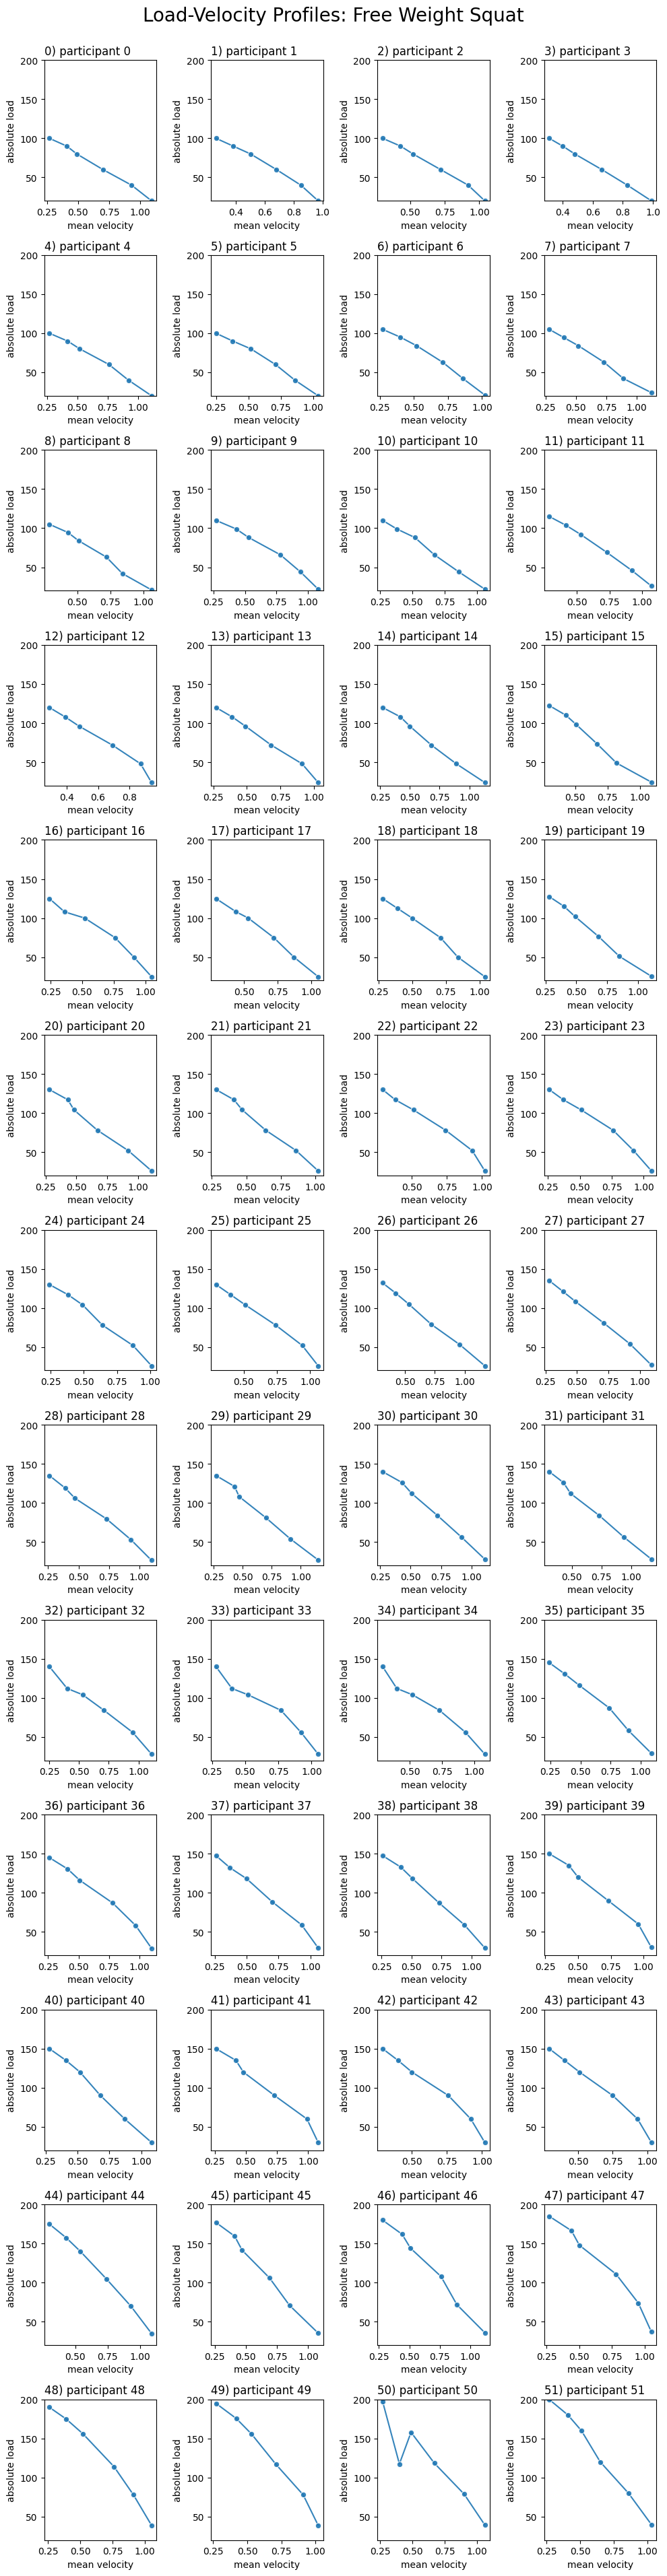

In [325]:
lv_profiles_fw = plot_profiles(reshape_group_df(df_fw2), title='Load-Velocity Profiles: Free Weight Squat')
# lv_profiles_fw.savefig('../output/figures/individual_lv_profiles_fw.png')

### Smith Machine

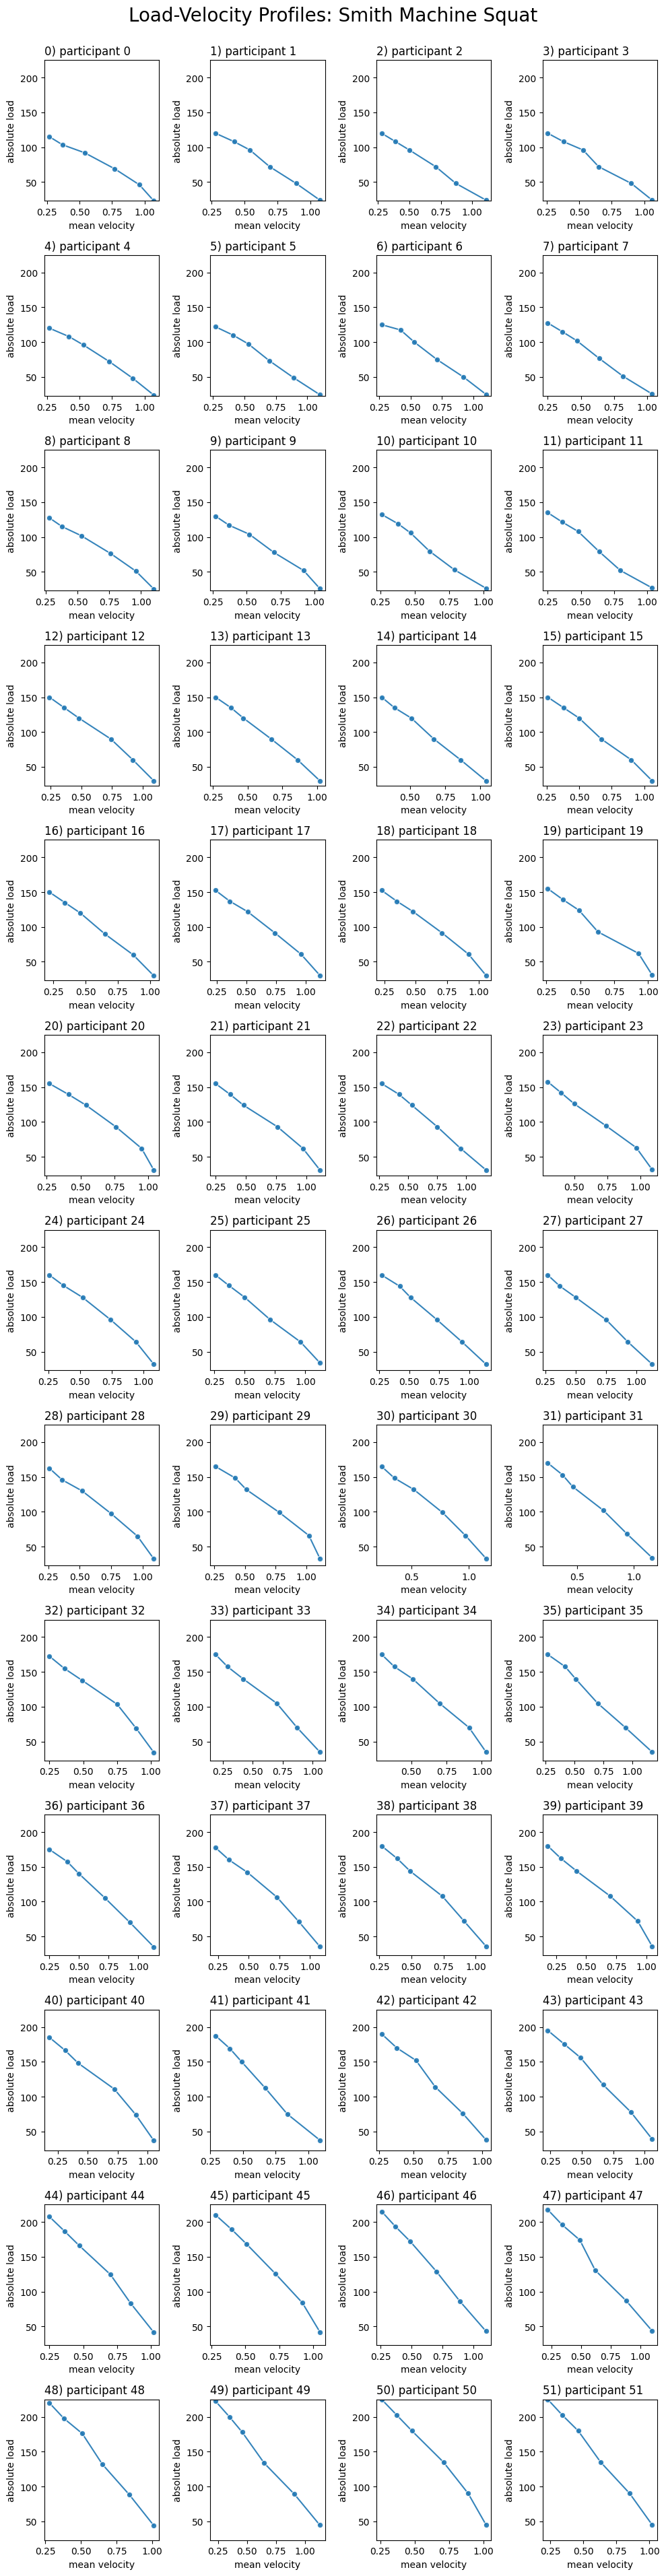

In [326]:
lv_profiles_sm = plot_profiles(reshape_group_df(df_sm), 
    title='Load-Velocity Profiles: Smith Machine Squat')
# lv_profiles_sm.savefig('../output/figures/individual_lv_profiles_smith.png')

## Data entry error

In [ ]:
plot_profiles(reshaped_df[reshaped_df['participant'] >46 ]);

In [86]:
reshaped_df[reshaped_df['participant'] == 50]

,participant,absolute load,1RM,%1RM,mean velocity
50,50,39.5,197.5,20.0,1.06
102,50,79.0,197.5,40.0,0.90
154,50,118.5,197.5,60.0,0.67
206,50,158.0,197.5,80.0,0.49
258,50,117.5,197.5,90.0,0.40
310,50,197.5,197.5,100.0,0.27


In [89]:
# look for the typo in participant 50's data

for i in [20, 40, 60, 80, 90, 100]:
    print(i/100 * 197.5)

39.5
79.0
118.5
158.0
177.75
197.5


## Reshape dataframe, use individual regression to predict

In [308]:
# # Create function # 2022-11-25 10:51 Realized I need to make load y-variable 
# import re
# def reshape_group_df_lr(df):
#     """
#     Reshape dataframe each row represents data from one rep (each participant has multiple columns).
#     Add the estimations from the linear regression.
#     """
#     # Calculate slope and intercept for each row of the dataframe (i.e. for each individual participant)
#     # by calling the linear_regression function.
#     print('Original shape: ',df.shape)
#     df = df.transpose().apply(lambda x:linear_regression(x)).transpose()
    
#     velocity_columns = df.columns[df.columns.str.contains('MV')]
#     load_columns = df.columns[df.columns.str.contains('Load')]

#     # Use intercept and slope to calculate predicted MV
#     for column in load_columns[:-1]:
#         df[re.sub('Load(\d*%)1RM.*','\\1 predicted MV', column)] = df['slope'] * df[column] + df['intercept']
#     df['predicted 1RM'] = df['slope'] * df[load_columns[-1]] + df['intercept']
    
#     prediction_columns = df.columns[df.columns.str.contains('predicted MV')].to_list() + ['predicted 1RM']

#     # Sort participants by strength
#     df = df.sort_values('Load-1RM-1').reset_index(drop=True)
#     df2 = pd.concat([
#         df.melt(
#             value_vars=load_columns, value_name='absolute load',
#             ignore_index=False
#         ),
#         df.melt(
#             id_vars='Load-1RM-1',
#             value_vars=velocity_columns, var_name='%1RM', value_name='mean velocity',
#             ignore_index=False
#             ),
#     ], axis=1).drop(columns='variable')

#     df3 = df.melt(
#             # id_vars='Load-1RM-1',
#             value_vars=prediction_columns, value_name='predicted mean velocity', 
#             ignore_index=False
#             ).reset_index(drop=True).drop(columns='variable')
#     df2['%1RM'] = df2['%1RM'].str.replace('(\d*)\D*','\\1', regex=True).astype(float)
#     df2 = df2.rename({'Load-1RM-1':'1RM'}, axis=1)

#     df2 = df2.reset_index(names='participant')
#     df2 = pd.concat([df2,df3],axis=1)
#     print('New shape: ', df2.shape)

#     return df2


# # Test the function on first participant's data
# print(df_fw.head(1).filter(regex='Load|MV'))
# reshape_group_df_lr(df_fw.head(3))

   Load20%1RM  Load40%1RM  Load60%1RM  Load80%1RM  Load90%1RM  Load-1RM-1  \
0        39.0          78       114.0       156.0       175.0       190.0   

   20% MV  40%MV  60%MV  80%MV  90%MV  100%MV  
0    1.05   0.91   0.76   0.52   0.39    0.26  
Original shape:  (3, 15)
New shape:  (18, 6)


,participant,absolute load,1RM,%1RM,mean velocity,predicted mean velocity
0,0,24.0,120.0,20.0,1.03,1.063649
1,1,26.0,130.0,20.0,1.06,1.106140
2,2,39.0,190.0,20.0,1.05,1.095619
3,0,48.0,120.0,40.0,0.91,0.870175
4,1,52.0,130.0,40.0,0.92,0.901930
5,2,78.0,190.0,40.0,0.91,0.893563
6,0,72.0,120.0,60.0,0.68,0.676702
7,1,78.0,130.0,60.0,0.76,0.697719
8,2,114.0,190.0,60.0,0.76,0.707050
9,0,96.0,120.0,80.0,0.49,0.483228


In [335]:
# 2022-11-25 10:51 Realized I need to make load y-variable # Create function
import re
def reshape_group_df_lr(df):
    """
    Reshape dataframe each row represents data from one rep (each participant has multiple columns).
    Add the estimations from the linear regression.
    """
    # Calculate slope and intercept for each row of the dataframe (i.e. for each individual participant)
    # by calling the linear_regression function.
    print('Original shape: ',df.shape)
    df = df.transpose().apply(lambda x:linear_regression(x)).transpose()
    
    velocity_columns = df.columns[df.columns.str.contains('MV')]
    load_columns = df.columns[df.columns.str.contains('Load')]

    # Use intercept and slope to calculate predicted load
    for column in velocity_columns:
        df[re.sub('(\d*%).*','\\1 predicted load', column)] = df['slope'] * df[column] + df['intercept']
    
    prediction_columns = df.columns[df.columns.str.contains('predicted load')].to_list()

    # Sort participants by strength
    df = df.sort_values('Load-1RM-1').reset_index(drop=True)
    df2 = pd.concat([
        df.melt(
            value_vars=load_columns, value_name='absolute load',
            ignore_index=False
        ),
        df.melt(
            id_vars='Load-1RM-1',
            value_vars=velocity_columns, var_name='%1RM', value_name='mean velocity',
            ignore_index=False
            ),
    ], axis=1).drop(columns='variable')

    df3 = df.melt(
            # id_vars='Load-1RM-1',
            value_vars=prediction_columns, value_name='predicted load', 
            ignore_index=False
            ).reset_index(drop=True).drop(columns='variable')
    df2['%1RM'] = df2['%1RM'].str.replace('(\d*)\D*','\\1', regex=True).astype(float)
    df2 = df2.rename({'Load-1RM-1':'1RM'}, axis=1)

    df2 = df2.reset_index(names='participant')
    df2 = pd.concat([df2,df3],axis=1)
    print('New shape: ', df2.shape)

    return df2


# Test the function on first participant's data
print(df_fw.head(1).filter(regex='Load|MV'))
reshape_group_df_lr(df_fw.head(3))

   Load20%1RM  Load40%1RM  Load60%1RM  Load80%1RM  Load90%1RM  Load-1RM-1  \
0        39.0          78       114.0       156.0       175.0       190.0   

   20% MV  40%MV  60%MV  80%MV  90%MV  100%MV  
0    1.05   0.91   0.76   0.52   0.39    0.26  
Original shape:  (3, 15)
New shape:  (18, 6)


,participant,absolute load,1RM,%1RM,mean velocity,predicted load
0,0,24.0,120.0,20.0,1.03,28.527754
1,1,26.0,130.0,20.0,1.06,32.703260
2,2,39.0,190.0,20.0,1.05,49.258845
3,0,48.0,120.0,40.0,0.91,43.307844
4,1,52.0,130.0,40.0,0.92,50.247317
5,2,78.0,190.0,40.0,0.91,75.774434
6,0,72.0,120.0,60.0,0.68,71.636350
7,1,78.0,130.0,60.0,0.76,70.297668
8,2,114.0,190.0,60.0,0.76,104.183994
9,0,96.0,120.0,80.0,0.49,95.038159


## Plot individuals' predicted and measured load velocity profiles 

In [236]:
# # 2022-11-25 10:41 Realized I should make load the y-variable
# import matplotlib.pyplot as plt
# def plot_profiles_lr(df, y='mean velocity', x='absolute load', row='participant', 
#     y_pred='predicted mean velocity', show_legend=False, yaxis_label=None, xticks=None, title=None):

#     """
#     Make a figure containing subplots with lineplots. Subplots titles are labelled from a-z.

#     Parameters:
#     * df: Dataframe.
#     * y: Column name with y-axis data.
#     * x: Column name with x-axis data.
#     * column: Column name of categorical data for creating the different columns in the subplot. 
#         Default is Female/Male.
#     * row: Column name of categorical data for creating the different rows in the subplot.
#     * yaxis_label: Label of y-axis. If none, will default to the name of the data column.
#     * xticks: Ticks of the x-axis. If none, will be set to default.
#     * title: Subplot title. If none, will be blank.
#     """
    
#     participants = sorted(df[row].unique())
#     subplot_label = [x+1 for x in range(-1,100)]
#     nrows = round((len(participants)+1)/4)

#     title_variable = df[row].name
#     fig, ax = plt.subplots(nrows=nrows ,ncols=4, figsize=(10,nrows*2.5))
#     fig.suptitle(title, fontsize=20)
#     ymin = df[y].min()
#     ymax = df[y].max()
#     ax = ax.flatten()
#     # colors = sns.color_palette("rocket", as_cmap = True)

#     ax_index = 0
#     for index, participant in enumerate(participants):

#         if (show_legend==True) & (ax_index==0):
#             legend = 'full'
#         else:
#             legend = False
#         filter = (df[row] == participant)

#         # Plot measured values
#         sns.lineplot(data=df[filter], y=y, 
#             x=x, marker='o', alpha=0.9,
#             legend=legend, label='measured',
#                 ax = ax[ax_index])
#         # Plot predicted values
#         sns.lineplot(data=df[filter], y=y_pred, 
#             x=x, alpha=0.9, label='regression', ls=':',
#             legend=legend,
#                 ax = ax[ax_index])
#         if nrows > 1:
#             ax[ax_index].set_title(f'{subplot_label[ax_index]}) {title_variable} {participant}', loc='left')
#         else:
#             ax[ax_index].set_title(f'{subplot_label[ax_index]})', loc='left')
#         ax[ax_index].set_ylim([ymin,ymax]) # Make the y axes all the same
#         if yaxis_label:
#             ax[ax_index].set_ylabel(yaxis_label)
#         if xticks:
#             ax[ax_index].xaxis.set_ticks(xticks)
#         if (legend == 'full'):
#             ax[ax_index].legend()

#         ax_index += 1
        
#     plt.tight_layout(rect=[0, 0, 1, 0.98])
#     return fig

In [340]:
# 2022-11-25 10:41 Realized I should make load the y-variable
import matplotlib.pyplot as plt
def plot_profiles_lr(df, y='absolute load', x='mean velocity', row='participant', 
    y_pred='predicted load', show_legend=False, yaxis_label=None, xticks=None, title=None, scale=False):

    """
    Make a figure containing subplots with lineplots. Subplots titles are labelled from a-z.

    Parameters:
    * df: Dataframe.
    * y: Column name with y-axis data.
    * x: Column name with x-axis data.
    * column: Column name of categorical data for creating the different columns in the subplot. 
        Default is Female/Male.
    * row: Column name of categorical data for creating the different rows in the subplot.
    * yaxis_label: Label of y-axis. If none, will default to the name of the data column.
    * xticks: Ticks of the x-axis. If none, will be set to default.
    * title: Subplot title. If none, will be blank.
    """
    
    participants = sorted(df[row].unique())
    subplot_label = [x+1 for x in range(-1,100)]
    nrows = round((len(participants)+1)/4)

    title_variable = df[row].name
    fig, ax = plt.subplots(nrows=nrows ,ncols=4, figsize=(10,nrows*2.5))
    fig.suptitle(title, fontsize=20)
    ymin = df[y].min()
    ymax = df[y].max()
    ax = ax.flatten()
    # colors = sns.color_palette("rocket", as_cmap = True)

    ax_index = 0
    for index, participant in enumerate(participants):

        if (show_legend==True) & (ax_index==0):
            legend = 'full'
        else:
            legend = False
        filter = (df[row] == participant)

        # Plot measured values
        sns.lineplot(data=df[filter], y=y, 
            x=x, marker='o', alpha=0.9,
            legend=legend, label='measured',
                ax = ax[ax_index])
        # Plot predicted values
        sns.lineplot(data=df[filter], y=y_pred, 
            x=x, alpha=0.9, label='regression', ls=':',
            legend=legend,
                ax = ax[ax_index])
        if nrows > 1:
            ax[ax_index].set_title(f'{subplot_label[ax_index]}) {title_variable} {participant}', loc='left')
        else:
            ax[ax_index].set_title(f'{subplot_label[ax_index]})', loc='left')
        if scale==True:
            ax[ax_index].set_ylim([ymin,ymax]) # Make the y axes all the same
        if yaxis_label:
            ax[ax_index].set_ylabel(yaxis_label)
        if xticks:
            ax[ax_index].xaxis.set_ticks(xticks)
        if (legend == 'full'):
            ax[ax_index].legend()

        ax_index += 1
        
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    return fig

Original shape:  (52, 15)
New shape:  (312, 6)


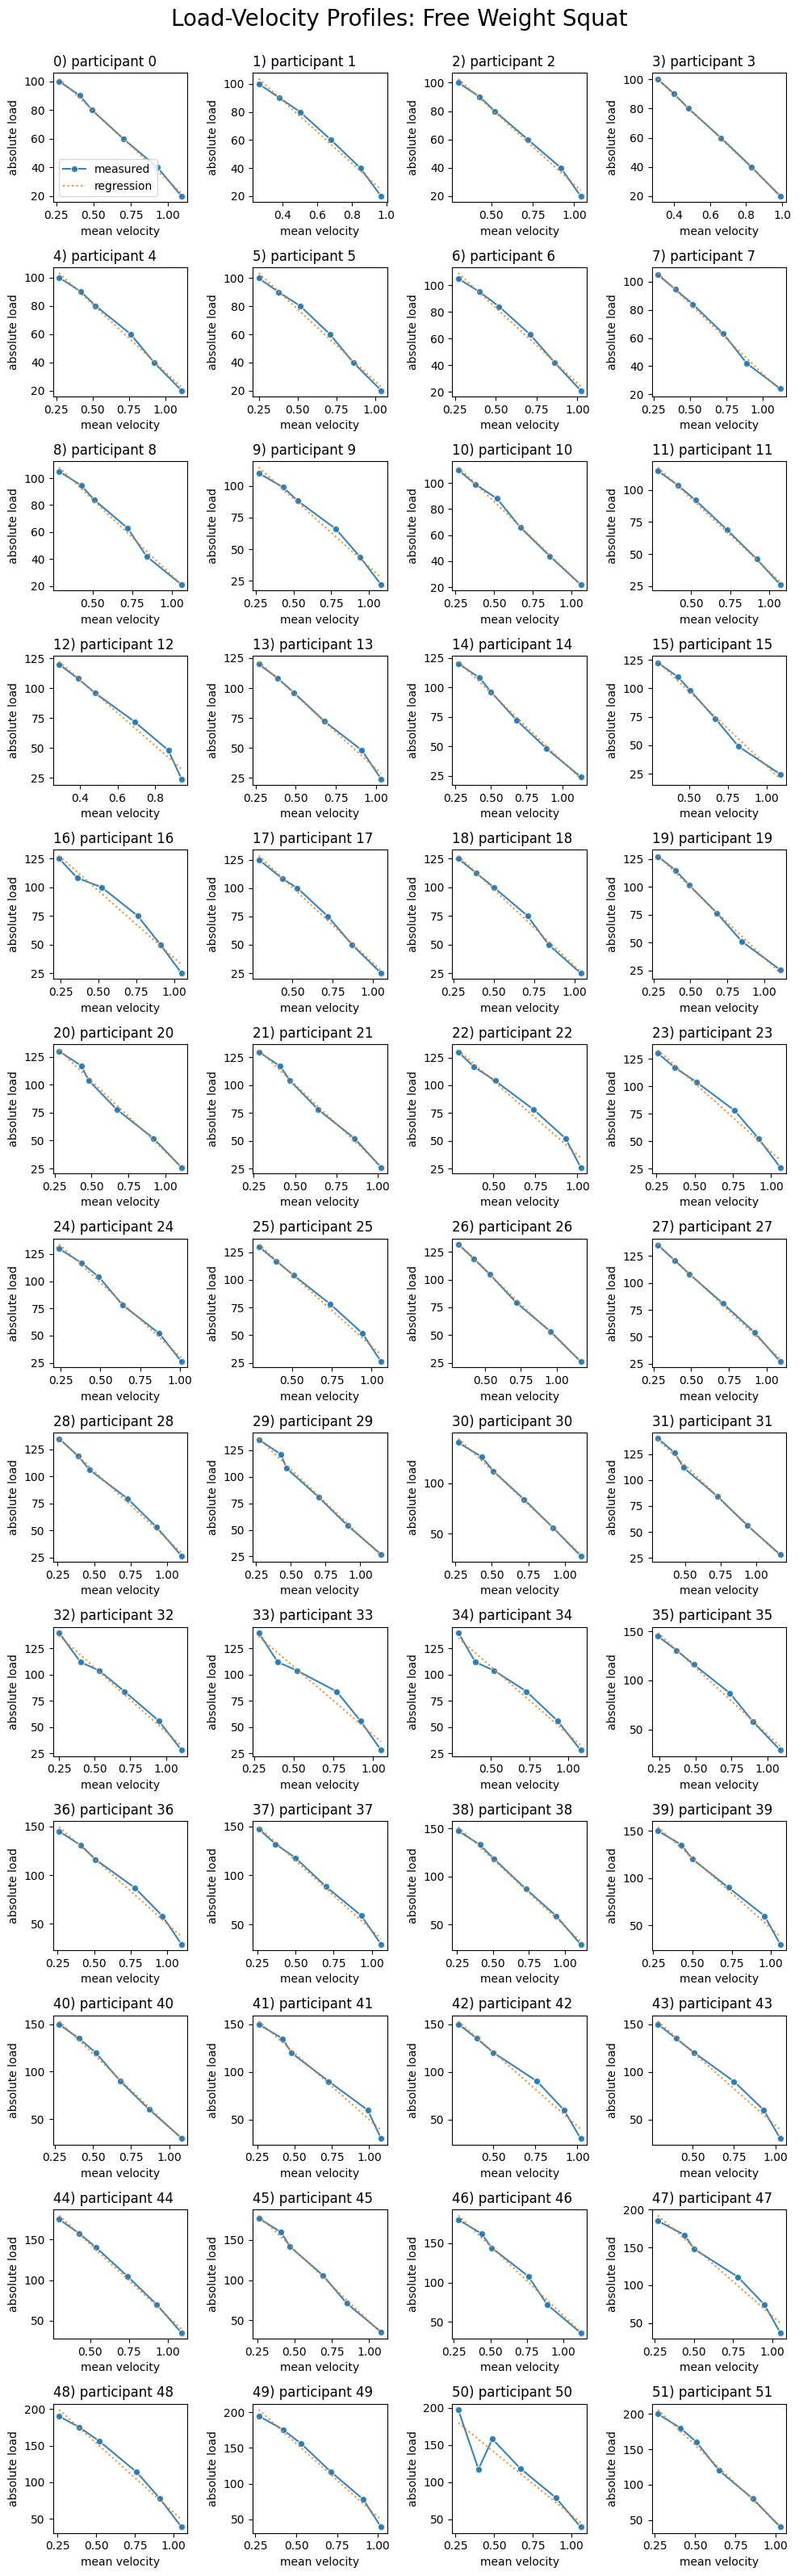

In [341]:
lv_profiles_predictions_fw = plot_profiles_lr(reshape_group_df_lr(df_fw), title='Load-Velocity Profiles: Free Weight Squat',
show_legend=True);

lv_profiles_predictions_fw.savefig('../output/figures/individual_lv_profiles_fw.png')

Original shape:  (52, 15)
New shape:  (312, 6)


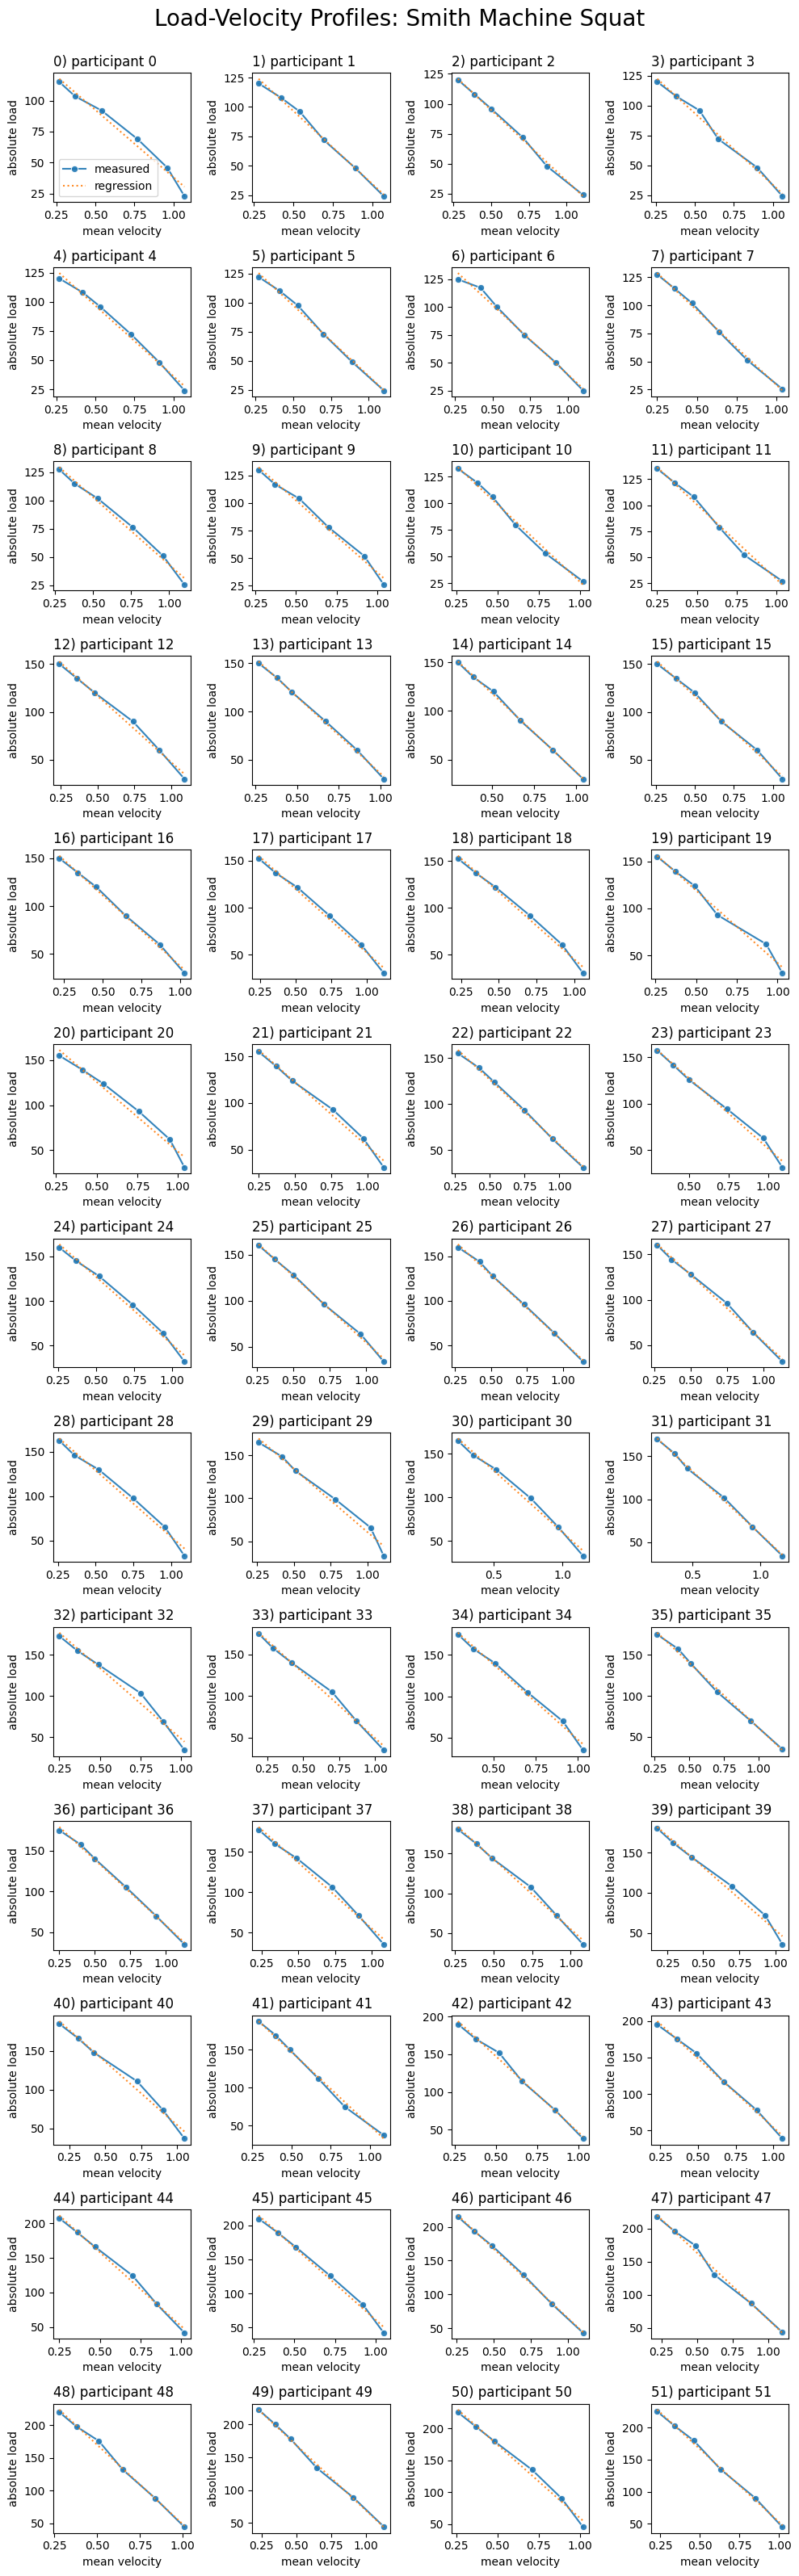

In [342]:
lv_profiles_predictions_sm = plot_profiles_lr(reshape_group_df_lr(df_sm), title='Load-Velocity Profiles: Smith Machine Squat',
show_legend=True, scale=False);

lv_profiles_predictions_sm.savefig('../output/figures/individual_lv_profiles_smith.png')

# Modeling Prep

## Functions

### Machine Learning Functions

In [313]:
# Function for model evaluation with train_test_split
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate_regression(y_test, y_pred, y_train, y_pred_train, model_name='regressor',plot=True):
    """
    * Print model evalutation metrics: 
        * RMSE
        * Mean absolute error (MAE)
        * R^2 score
        * Pearson correlation coefficient
    * If plot=True : Provide scatterplot of true vs. predicted values.
    Params:
    - plot (bool): If true, plot true vs. predicted values using test data set from train-test split.

    Returns: 
    - Evaluation metrics for train and test data subsets:
        - `.r2_train` and `.r2`
        - `.rmse_train` and `.rmse`
        - `.mean_abs_error_train` and `.mean_abs_error`
    """
    # Metrics for test data
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mean_abs_error = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Metrics for training data

    rmse_train = mean_squared_error(y_train, y_pred_train)
    mean_abs_error_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    
    # Calculate Pearson Correlation between predicted and true values:
    pearson = stats.pearsonr(y_test, y_pred)

    print(f'\n{model_name} evaluation metrics: \n\tTest data\tTraining data\t\tDifference')
    print(f'RMSE: \t\t{rmse:.2f}\t\t{rmse_train:.2f}\t\t{(rmse - rmse_train):.2f}')
    print(f'MAE: \t\t{mean_abs_error:.2f}\t\t{mean_abs_error_train:.2f}\t\t{(mean_abs_error - mean_abs_error_train):.2f}')
    print(f'R^2: \t\t{r2:.2f}\t\t{r2_train:.2f}\t\t{(r2 - r2_train):.2f}')
    print(f'\nPearson correlation coefficient (r) for predicted and true values: {pearson.statistic:.2f} (p-value of {pearson.pvalue:.2f}).')

    if plot:
        ax = sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], ls=':', alpha=0.5)
        fig = sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, ax=ax)
        fig.set_xlabel('Measured')
        fig.set_ylabel('Predicted')
    return fig

In [296]:
# Function to run model and evaluate it
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def model_data(df_train, df_test, x_columns, model, model_name='regressor'):
    """
    Model, fit, and evaluate.
    """
    X_train = df_train[x_columns]
    X_test = df_test[x_columns]
    y_train = df_train['Load-1RM-1']
    y_test = df_test['Load-1RM-1']
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    fig = evaluate_regression(y_test, y_pred, y_train, y_pred_train, model_name=model_name, plot=True)

    return y_pred_train, y_pred, fig


### Statistical Modelling Functions

In [314]:
# Function for prediction evaluation compared with statistical modelling
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def compare_ml_stat(y_test, y_pred, y_pred_stat, model_name='regressor',plot=True):
    """
    * Print model evalutation metrics: 
        * RMSE
        * Mean absolute error (MAE)
        * R^2 score
        * Pearson correlation coefficient
    * If plot=True : Provide scatterplot of true vs. predicted values.
    Params:
    - plot (bool): If true, plot true vs. predicted values using test data set from train-test split.

    Returns: 
    - Evaluation metrics for train and test data subsets:
        - `.r2_train` and `.r2`
        - `.rmse_train` and `.rmse`
        - `.mean_abs_error_train` and `.mean_abs_error`
    """
    # Metrics for test data
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mean_abs_error = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Metrics for statistical linear regression
    rmse_stat = mean_squared_error(y_test, y_pred_stat, squared=False)
    mean_abs_error_stat = mean_absolute_error(y_test, y_pred_stat)
    r2_stat = r2_score(y_test, y_pred_stat)

    # Calculate Pearson Correlation between predicted and true values:
    pearson = stats.pearsonr(y_test, y_pred)

    print(f'\n{model_name} evaluation metrics: \n\tMachine Learning\tStatistical Modelling\t\tDifference')
    print(f'RMSE: \t\t{rmse:.2f}\t\t{rmse_stat:.2f}\t\t{(rmse - rmse_stat):.2f}')
    print(f'MAE: \t\t{mean_abs_error:.2f}\t\t{mean_abs_error_stat:.2f}\t\t{(mean_abs_error - mean_abs_error_stat):.2f}')
    print(f'R^2: \t\t{r2:.2f}\t\t{r2_stat:.2f}\t\t{(r2 - r2_stat):.2f}')
    print(f'\nPearson correlation coefficient (r) for predicted and true values: {pearson.statistic:.2f} (p-value of {pearson.pvalue:.2f}).')

    if plot:
        ax = sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], ls=':', alpha=0.5)
        fig = sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, ax=ax)
        fig.set_xlabel('Measured')
        fig.set_ylabel('Predicted')
    return fig

## Calculate individual slope and intercept

In [287]:
# individual MVT
df_sm2 = individual_regression(df_sm)
df_sm2.head()



Dataframe shape:  (18, 52)


,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV,slope,intercept,group MVT
0,22.0,77.8,175.0,42.0,84.0,126.0,168.0,189.0,210.0,1.05,0.92,0.72,0.51,0.40,0.28,-0.004652,1.281614,0.255577
1,21.0,71.6,179.0,30.0,60.0,90.0,120.0,135.0,150.0,1.06,0.90,0.67,0.50,0.38,0.26,-0.006660,1.277649,0.255577
2,19.0,60.8,165.0,30.0,60.0,90.0,120.0,135.0,150.0,1.09,0.92,0.74,0.48,0.36,0.24,-0.007179,1.338281,0.255577
3,21.0,58.4,172.0,24.0,48.0,72.0,96.0,108.0,120.0,1.07,0.91,0.73,0.53,0.42,0.27,-0.008184,1.293368,0.255577
4,20.0,82.3,185.0,35.0,70.0,105.0,140.0,157.5,175.0,1.03,0.91,0.70,0.51,0.38,0.29,-0.005450,1.256561,0.255577


In [306]:
df_sm_lr = reshape_group_df_lr(df_sm)
df_sm_lr.head()

,participant,absolute load,1RM,%1RM,mean velocity,predicted mean velocity
0,0,23.0,115.0,20.0,1.07,1.129439
1,1,24.0,120.0,20.0,1.07,1.078912
2,2,24.0,120.0,20.0,1.11,1.099965
3,3,24.0,120.0,20.0,1.06,1.074316
4,4,24.0,120.0,20.0,1.07,1.096947


## Train test split

In [288]:
from sklearn.model_selection import train_test_split
sm_train, sm_test = train_test_split(df_sm2, train_size=.8, random_state=0)
print(sm_train.shape)
print(sm_test.shape)

(41, 18)
(11, 18)


# Modelling: Smith machine

In [310]:
df_sm2.head()

,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV,slope,intercept,group MVT
0,22.0,77.8,175.0,42.0,84.0,126.0,168.0,189.0,210.0,1.05,0.92,0.72,0.51,0.40,0.28,-0.004652,1.281614,0.255577
1,21.0,71.6,179.0,30.0,60.0,90.0,120.0,135.0,150.0,1.06,0.90,0.67,0.50,0.38,0.26,-0.006660,1.277649,0.255577
2,19.0,60.8,165.0,30.0,60.0,90.0,120.0,135.0,150.0,1.09,0.92,0.74,0.48,0.36,0.24,-0.007179,1.338281,0.255577
3,21.0,58.4,172.0,24.0,48.0,72.0,96.0,108.0,120.0,1.07,0.91,0.73,0.53,0.42,0.27,-0.008184,1.293368,0.255577
4,20.0,82.3,185.0,35.0,70.0,105.0,140.0,157.5,175.0,1.03,0.91,0.70,0.51,0.38,0.29,-0.005450,1.256561,0.255577


In [320]:
def stat_modelling(df):
    y_pred_stat = (1/df['slope']) * df['100%MV'] + 1/df['intercept']
    y_test = df['Load-1RM-1']
    print(y_pred_stat)
    # eval_statmodel_fig = compare_ml_stat(y_test, y_pred_stat, y_pred_stat, model_name='regressor',plot=True)

stat_modelling(df_sm2)

0    -59.413699
1    -38.258408
2    -32.683858
3    -32.217179
4    -52.418857
5    -34.841968
6    -42.171857
7    -39.169768
8    -30.812853
9    -67.608790
10   -53.922007
11   -39.620939
12   -34.650624
13   -29.177502
14   -52.825701
15   -34.135260
16   -36.855679
17   -33.349750
18   -46.834784
19   -37.121395
20   -39.893158
21   -38.996410
22   -34.328284
23   -44.966035
24   -55.516950
25   -45.092719
26   -39.655350
27   -27.672550
28   -59.413306
29   -38.660572
30   -32.020433
31   -33.173833
32   -37.222490
33   -32.346860
34   -48.042159
35   -33.557042
36   -32.073361
37   -43.784293
38   -42.788240
39   -38.396096
40   -42.395272
41   -29.087870
42   -52.965675
43   -41.934061
44   -32.366469
45   -29.228965
46   -42.950458
47   -35.144280
48   -31.690401
49   -37.329464
50   -32.344522
51   -51.654604
dtype: float64


## Model 2 statistical linear regression

In [311]:
y_pred_stat1 = df_sm2['slope'] * df_sm2['100%MV'] + df_sm2['intercept']

In [ ]:
def

In [ ]:
eval_statmodel_fig1 = compare_ml_stat(y_test, y_pred, y_pred_stat, model_name='regressor',plot=True)

## Model 2 modified


model 2 evaluation metrics: 
	Test data	Training data		Difference
RMSE: 		6.10		35.32		-29.22
MAE: 		5.18		4.67		0.51
R^2: 		0.94		0.96		-0.03

Pearson correlation coefficient (r) for predicted and true values: 0.98 (p-value of 0.00).


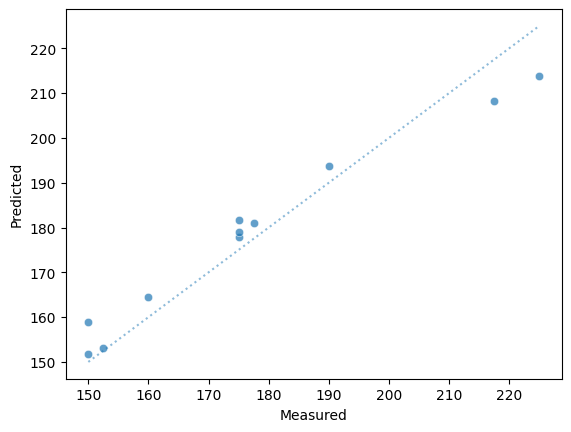

In [301]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
y_pred_train2, y_pred2, eval_fig2 = model_data(sm_train, sm_test, x_columns=['slope', 'intercept', '100%MV'], 
    model=model2, model_name='model 2')
eval_fig2.figure.savefig('../output/figures/model2.png')

In [302]:
y_pred2

array([213.71080437, 208.30362211, 164.59157919, 158.9226366 ,
       151.81059763, 153.17979632, 177.78029396, 180.91533926,
       179.079962  , 181.57068592, 193.62455619])

In [304]:
model2.coef_

array([26023.01720565,   123.09311247,  -103.66078291])

## Model 1 2 modified


model 1 evaluation metrics: 
	Test data	Training data		Difference
RMSE: 		7.67		42.38		-34.72
MAE: 		6.29		5.27		1.02
R^2: 		0.90		0.96		-0.06

Pearson correlation coefficient (r) for predicted and true values: 0.96 (p-value of 0.00).


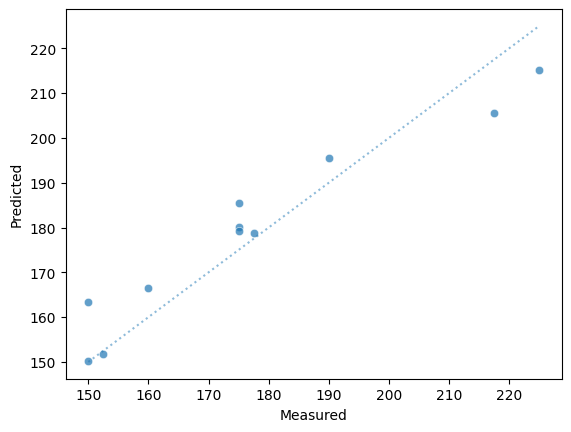

In [303]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
y_pred_train1, y_pred1, eval_fig1 = model_data(sm_train, sm_test, x_columns=['slope', 'intercept', 'group MVT'], 
    model=model1, model_name='model 1')
eval_fig1.figure.savefig('../output/figures/model1.png')

# *End of Page*